In [2]:
import numpy as np
import pandas as pd

from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time
from tqdm import tqdm

In [65]:
#1.테스트 브라우저 열어주기
driver= wb.Chrome()

url="https://map.naver.com/p?c=15.00,0,0,0,dh" #네이버지도
driver.get(url)

In [66]:
#2. 검색하기 -> 이수역 맛집
query = input("검색할 단어를 입력>> ") #질의

검색할 단어를 입력>>  이수역 맛집


In [67]:
#검색란 가져오기
searchInput= driver.find_element(By.CSS_SELECTOR, ".input_search")

In [68]:
searchInput.send_keys(query+"\n")

In [37]:
#가게명 수집하기 -> 안됨. iframe으로 다른 document이기 때문. 하나도 안가져와지는게 정상.
driver.find_elements(By.CSS_SELECTOR," div > div > span.TYaxT")

#_pcmap_list_scroll_container > ul > li:nth-child(1) > div.CHC5F > a > div > div > span.TYaxT
# li:nth-child(3) : ul태그 안에 li태그는 여러개가 존재한다. 그중 해당 li태그의 고유 번호를 의미!

[]

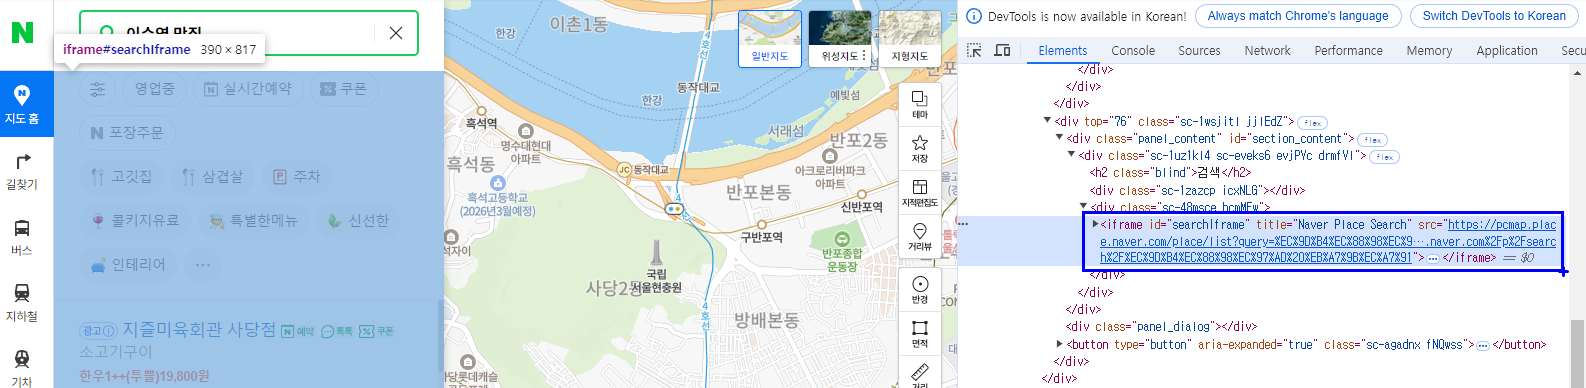

### iframe 태그
- 하나의 doc에서 다른 doc을 구성하고자 할 때 사용 -> 동영상, 뮤직비디오 등
---
- 여태껏 했던 크롤링-> 일반적인 접근
- 일반적인 접근은 웹페이지 전체(doc)를 불러옴
- iframe내에 있는 요소에 접근하려면, 일반적인 접근으로는 불가능!

1번째 가게 수집

In [69]:
# iframe 창 전환하는 함수
driver.switch_to.frame("searchIframe") #id값만 적어주기

In [71]:
#가게명 수집하기
foodStores=driver.find_elements(By.CSS_SELECTOR," div > div > span.TYaxT")
foodStores[0].text

'홍주고깃간'

### 가게명 말고도, 가게 주소와 전화번호 수집

In [54]:
foodStores[0].click()

In [28]:
# driver.find_element(By.CSS_SELECTOR,"div.O8qbU.tQY7D > div > a > span.LDgIH")
# 현재 iframe내에는 해당 요소가 없음!
# 옮겨주어야 함!

In [55]:
# 이전 창으로 되돌아가는 함수
driver.switch_to.default_content()

In [56]:
driver.switch_to.frame("entryIframe") # 상세 페이지로 접근

In [32]:
# 주소도 잘 가져와진다!
storeadd=driver.find_element(By.CSS_SELECTOR, " div.O8qbU.tQY7D > div > a > span.LDgIH").text

In [34]:
# 전화번호 가져오기
storePhone=driver.find_element(By.CSS_SELECTOR, "span.xlx7Q").text

2번째 가게 수집

In [35]:
driver.switch_to.default_content()

In [ ]:
# iframe 창 전환하는 함수
driver.switch_to.frame("searchIframe")

In [44]:
#가게명 수집하기
#새롭게 접근하는 페이지마다 요소 로드하기!
foodStores=driver.find_elements(By.CSS_SELECTOR," div > div > span.TYaxT")

KeyboardInterrupt: 

In [ ]:
foodStores[1].click()

In [74]:
driver.quit()

### 실습!! 가게 정보 수집하기!
- 1page 내에서 가게명, 가게 주소, 전화번호 수집!

In [46]:
#1.브라우저열기
#2.요청
#3.검색
#4.창전환
#5.클릭할 요소들 가져오기 (가게명 수집)
#6.창전환
#7.해당 요소 클릭 후 정보 수집 (주소, 전화번호 수집)
#8.다시 홈으로 이동
#9.4~8까지 반복하면서 수집
#10.저장(to_csv)
#11.자원반납

In [26]:
# 1. 브라우저 열기
driver = wb.Chrome()
url = "https://map.naver.com/p?c=15.00,0,0,0,dh" # 네이버 지도
driver.get(url)
time.sleep(3)

# 2. 요청
query = input("검색할 단어를 입력 >> ")

# 3. 검색
search_input = driver.find_element(By.CSS_SELECTOR, ".input_search")
search_input.send_keys(query + "\n")
time.sleep(5)

store_names = []
store_adds = []
store_phones = []

driver.maximize_window() # 최대화

i = 0
#9.4~8까지 반복하면서 수집
while True : 
    # 4. 창전환
    driver.switch_to.frame("searchIframe")
    time.sleep(1)
    
    # 5. 클릭할 요소들 가져오기
    food_stores = driver.find_elements(By.CSS_SELECTOR, "span.TYaxT")
    food_stores[i].click()
    time.sleep(2)
    
    # 6. 창전환
    driver.switch_to.default_content()
    time.sleep(1)
    
    driver.switch_to.frame("entryIframe")
    time.sleep(1)

    # 7. 해당 요소 클릭 후 정보 수집
    try :     
        store_name = driver.find_element(By.CSS_SELECTOR, "#_title > div > span.GHAhO").text
        store_names.append(store_name)
    except : 
        store_names.append("없음")

    try : 
        store_add = driver.find_element(By.CSS_SELECTOR, "div.O8qbU.tQY7D > div > a > span.LDgIH").text
        store_adds.append(store_add)
    except : 
        store_adds.append("없음")

    try : 
        store_phone = driver.find_element(By.CSS_SELECTOR, "div.O8qbU.nbXkr > div > span.xlx7Q").text
        store_phones.append(store_phone)
    except : 
        store_phones.append("없음")


    
    # 8. 다시 홈으로 이동
    driver.switch_to.default_content()
    time.sleep(1)

    i += 1
    if i == len(food_stores) : 
        break

검색할 단어를 입력 >>  이수역 맛집


In [27]:
#10.저장(to_csv)
pd.DataFrame({
    "가게명":store_names,
    "가게 주소":store_adds,
    "가게 번호":store_phones
})

,가게명,가게 주소,가게 번호
0,야키니쿠마리,서울 동작구 동작대로7길 70 1층,0507-1379-4231
1,이수가 본점,서울 동작구 동작대로29가길 30 1층,0507-1348-1372
2,애플하우스,서울 동작구 동작대로27다길 29 2층,02-595-1629
3,이수곱창,서울 동작구 동작대로27가길 6-4 1층 이수곱창,010-4554-9469
4,외양간,서울 동작구 동작대로11길 16 1층,0507-1484-8223
5,목구멍 이수점,서울 동작구 동작대로27길 16-4,0507-1417-1959
6,사이집 사당본점,서울 동작구 동작대로9길 10 1층,0507-1417-0287
7,스시로로,서울 동작구 동작대로23길 29 1층,02-585-1015
8,규스홈 레스토랑,서울 서초구 방배천로 62 1층 규스홈 레스토랑,02-598-5584
9,코시 이수점,"서울 동작구 사당로 300 1층 126호, 127호",0507-1349-3723


In [ ]:
#11.자원반납

In [28]:
driver.quit()

In [ ]:
#1.테스트 브라우저 열어주기
driver= wb.Chrome()

#2.요청
url="https://map.naver.com/p?c=15.00,0,0,0,dh" #네이버지도
driver.get(url)

#3. 검색하기 -> 이수역 맛집
query = input("검색할 단어를 입력>> ") #질의

#검색란 가져오기
searchInput= driver.find_element(By.CSS_SELECTOR, ".input_search")
searchInput.send_keys(query+"\n") #enter누르고, 개행 시켜주는 거임.
time.sleep(5)

print("검색란 가져오기 완료!")

In [6]:
#4. iframe 창 전환하는 함수
driver.switch_to.frame("searchIframe") #id값만 적어주기
time.sleep(2)

NoSuchFrameException: Message: searchIframe


In [15]:
body= driver.find_element(By.CSS_SELECTOR, "body.place_on_pcmap")
body.send_keys(Keys.END)

In [ ]:
while True:
    # body= driver.find_element(By.TAG_NAME,"body")
    old = driver.page_source # 기존 페이지 소스( 문자열 자료형)

    #스크롤 하강
    body= driver.find_element(By.TAG_NAME, "body.place_on_pcmap")
    body.send_keys(Keys.END)
    time.sleep(2)
    
    new = driver.page_source # 갱신된 페이지 소스

    if old == new: #같은지 확인
        print("스크롤 하강 완료")
        break
    else:
        pass # 코드 리뷰할때 이러면 편하다

In [ ]:
i=0

while True : 
    #5 가게명 수집하기
    foodStores=driver.find_elements(By.CSS_SELECTOR," div > div > span.TYaxT")
    foodStores[i].click()
    time.sleep(5)
    
    #6 창전환
    # 홈 document로 이동
    driver.switch_to.default_content()
    
    time.sleep(2)
    
    #창전환
    driver.switch_to.frame("entryIframe") 
    
    #7 주소 수집!
    storeName=driver.find_element(By.CSS_SELECTOR, "#_title > div > span.GHAhO").text
    storeAdd=driver.find_element(By.CSS_SELECTOR, "div.O8qbU.tQY7D > div > a > span.LDgIH").text
    # 전화번호 수집
    storePhone=driver.find_element(By.CSS_SELECTOR, "span.xlx7Q").text
    
    #8 홈 document으로 이동
    driver.switch_to.default_content()
    
    time.sleep(2)
    
    driver.switch_to.frame("searchIframe")
    
    i+=1
    
    if i == len(foodStores): #같은지 확인
        print("수집완료 완료")
        break
    else:
        pass

In [18]:
driver.quit()

In [ ]:


# #10. 저장(csv)
# dictMenu = {
#     "가게명":menuList,
#     "가격":priceList
# }
# #DF제작
# menuDF= pd.DataFrame(dictMenu)
# #csv로 변환
# menuDF.to_csv("./menuDF.csv",encoding = "utf-8")

In [ ]:
aa

In [75]:
driver.quit()

In [47]:
len(foodStores)

10

In [ ]:
i=0
while True:
    #4. iframe 창 전환하는 함수
    driver.switch_to.frame("searchIframe") #id값만 적어주기
        
    #5 가게명 수집하기
    foodStores=driver.find_elements(By.CSS_SELECTOR," div > div > span.TYaxT")
    foodStores[i].click()
    
    #6 창전환
    # 홈 document로 이동
    driver.switch_to.default_content()
    #창전환
    driver.switch_to.frame("entryIframe") 
    
    #7 주소 수집!
    storeName=driver.find_element(By.CSS_SELECTOR, " div.O8qbU.tQY7D > div > a > span.LDgIH").text
    # 전화번호 수집
    storePhone=driver.find_element(By.CSS_SELECTOR, "span.xlx7Q").text
    
    #8 홈 document으로 이동
    driver.switch_to.default_content()
    
    i+=1
    if i == len(foodStores): #같은지 확인
        print("수집완료 완료")
        break
    else:
        pass


In [ ]:
#4. iframe 창 전환하는 함수
driver.switch_to.frame("searchIframe") #id값만 적어주기

#5 가게명 수집하기
foodStores=driver.find_elements(By.CSS_SELECTOR," div > div > span.TYaxT")
foodStores[0].click()

#6 창전환
# 홈 document로 이동
driver.switch_to.default_content()
#창전환
driver.switch_to.frame("entryIframe") 

#7 주소 수집!
storeName=driver.find_element(By.CSS_SELECTOR, " div.O8qbU.tQY7D > div > a > span.LDgIH").text
# 전화번호 수집
storePhone=driver.find_element(By.CSS_SELECTOR, "span.xlx7Q").text

#8 홈 document으로 이동
driver.switch_to.default_content()